**Install necessary Dependencies**

In [85]:
!pip install easyocr
!pip install imutils

In [86]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import imutils
import easyocr

**Read Image and perform preprocessing**

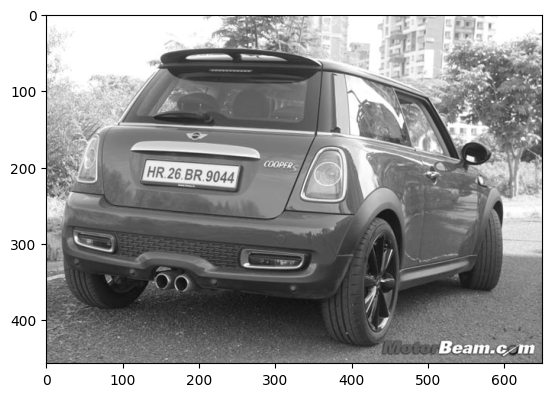

In [87]:
img=cv2.imread("image1.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')

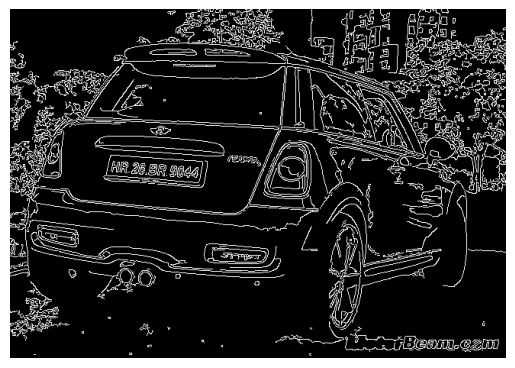

In [88]:
bFilter=cv2.bilateralFilter(gray,11,17,17)
edged=cv2.Canny(bFilter,30,200)
plt.imshow(edged, cmap='gray')
plt.axis('off')
plt.show()

**Find Contours**

In [89]:
keypoints=cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours=imutils.grab_contours(keypoints)
contours=sorted(contours,key=cv2.contourArea,reverse=True)[:10]

In [90]:
location=None
for contour in contours:
  approx=cv2.approxPolyDP(contour,10,True)
  if len(approx)==4:
    location=approx
    break

In [91]:
location

array([[[122, 219]],

       [[246, 227]],

       [[252, 200]],

       [[132, 191]]], dtype=int32)

**Masking**

In [92]:
mask=np.zeros(gray.shape,np.uint8)
new_image=cv2.drawContours(mask,[location],0,255,-1)
new_image=cv2.bitwise_and(img,img,mask=mask)

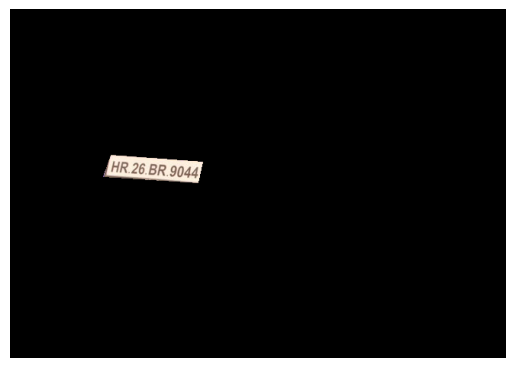

In [93]:
plt.imshow(new_image, cmap='gray')
plt.axis('off')
plt.show()

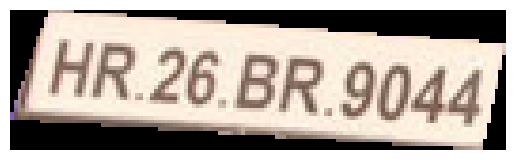

In [94]:
x,y,w,h=cv2.boundingRect(location)
cropped_image = new_image[y:y+h, x:x+w]
plt.imshow(cropped_image, cmap='gray')
plt.axis('off')
plt.show()

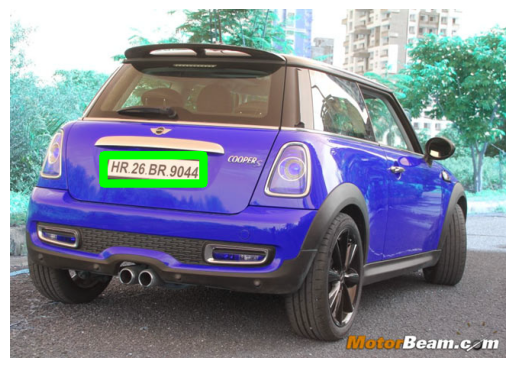

In [95]:
cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),10)
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.show()

**Find Text using EasyOCR**

In [96]:
reader=easyocr.Reader(['en'])
result=reader.readtext(cropped_image)
result

[([[6, 4], [128, 4], [128, 34], [6, 34]], 'HR.26 BR 9044', 0.5307689399204428)]

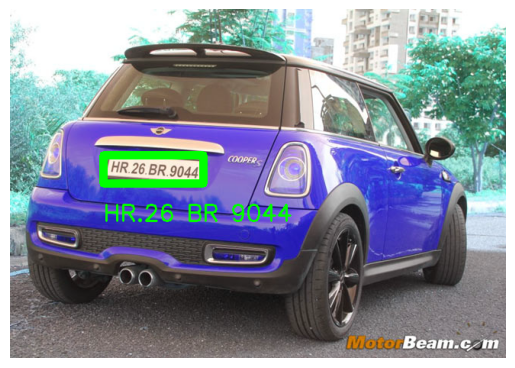

In [97]:
text=result[0][-2]
font=cv2.FONT_HERSHEY_SIMPLEX
res=cv2.putText(img,text,(approx[0][0][0],approx[1][0][1]+50),font,1,(0,255,0),2)
res=cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,0),3)
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show()